<a href="https://colab.research.google.com/github/IrinaBoyarchukova/A_B_test/blob/main/%D0%A3%D1%80%D0%BE%D0%BA_%229_AB_Lecture_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проверка данных на нормальность



<a id="Libraries"></a>
##  Загрузка библиотек 

In [ ]:
from scipy.stats import ttest_1samp
import numpy as np
import pandas as pd


from scipy.stats import norm, t, kstest, shapiro
import statsmodels.api as sm
from matplotlib import pyplot as plt


import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')



Проверка на нормальность

In [ ]:
np.random.seed(17)

# Помимо нормального распределения создадим выборку распределения Стьюдента 
# С пятью степенями своболы. Напомним, что по форме они очень сильно похожи

In [ ]:
x=norm.rvs(size=250)
y=t.rvs(size=250,df=5)

In [ ]:
import plotly.express as px
fig = px.histogram(y, x=y, title='y', marginal= 'box')
fig.show(renderer= 'colab')

In [ ]:
import plotly.express as px
fig = px.histogram(x, x=x, title='x', marginal= 'box')
fig.show(renderer= 'colab')

**Проверка на нормальность**

 Широко применяемыми методами проверки на нормальность являются:


*   Графические методы: Оценка данных с использованием гистограмм и QQ plot

*  Статистические методы: Критерий для проверки нормальности распределения (Критерий Шапиро-Уилка при n<5000 и Колмогорова Смирнова для выборки любого размера)


Можно визиально проверить работу тестов с помощью функции qqplot . Она построит график квантилей распределения по оси теоритического нормального распределения . Получится должна прямая, идущая из левого угла в верхний правый





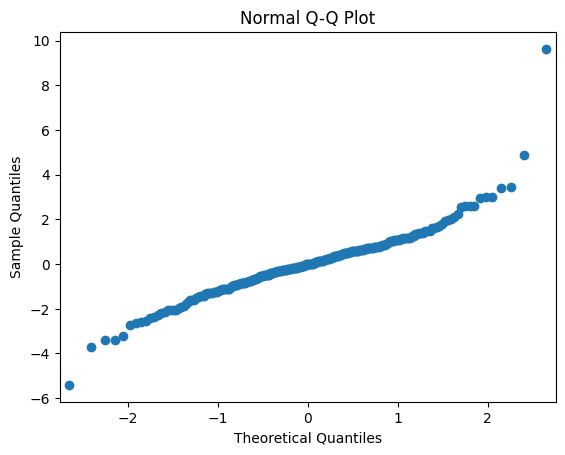

In [ ]:
fig=sm.qqplot(y, color ='green')
plt.title('Normal Q-Q Plot')
plt.show()

Тест Колмогорова-Смирнова может использоваться для выборки любого размера 

**Провека на нормальность тест Колмогорова-Смирнова **

Тест Колмагорова- Смирнова применяется для выборки любого размера

НО : взята из генеральной совокупности с нормальным распределением
Н1: взята из генеральной совокупности с другими распределениями

Тест Колмогорова Смитнова также можно использовать для проверки любого другого распределения

Принятие решения: 

**При р> alfa можно заключить, что анализируемое распределение не отличается от нормального** 

Его можно использовать для проверки любого распределения , в том числе и Стьюдента, Биномиального, Коши, Экспоненциального 






In [ ]:
#Проверим принадлежность выборок к нормальному распределению

print(kstest(x, "norm"))
print(kstest(y, "norm"))

KstestResult(statistic=0.057424163162479946, pvalue=0.3678988921991774, statistic_location=-0.006456710309898987, statistic_sign=-1)
KstestResult(statistic=0.054751982840907654, pvalue=0.4266179885446888, statistic_location=-1.0927671816577422, statistic_sign=1)


In [ ]:
# Семейство Экспоненциальных ( сложная гипотеза)

print(kstest(x, "expon"))

KstestResult(statistic=0.448, pvalue=2.739849972719059e-46, statistic_location=-0.0036960408325081625, statistic_sign=1)


Данное распределение по этим выборкам не отличается от нормального

In [ ]:
#Биномиальное, обратим внимание, что оно требует уточнения параметров (простая гипотеза)
print (kstest(x, "binom", args=(1500, 0.16)))

KstestResult(statistic=1.0, pvalue=0.0, statistic_location=3.3451573949029427, statistic_sign=1)


**Проверка на нормальность Тест Шапиро-Уилка**

Тест Шапиро-Уилка применяется для выборки состоящей из менее чем 5000 наблюдений

HO: Х взята генеральная совокупность с нормальным распределением
Н1: Х взята генеральная совокупность с другими распределениями

Тест Шапиро-Уилка является одним из наиболее мощных критериев для проверки нормальности

Принятые решения:

**При р> alfa можно заключить , что анализуруемое распределение не отличается от нормального**

In [ ]:
W, p_val=shapiro(x)
print ( "Shapiro-Wilk normality test for х")
print("W =", W)
print("p-value=", p_val)


Shapiro-Wilk normality test for х
W = 0.9963920712471008
p-value= 0.8381169438362122


In [ ]:
W, p_val=shapiro(y)
print ( "Shapiro-Wilk normality test for х")
print("W =", W)
print("p-value=", p_val)

Shapiro-Wilk normality test for х
W = 0.9189559817314148
p-value= 2.0091221741846965e-10


Можно обратить внимание, что тест Шапиро-Уилка отвергает нулевую гипотезу выборки уУ при том что тест Колмогорова - Смирнова говорит обратное p-value=0.43

**Анализ теста расчета длительности эксперимента**

**Факторы влияющие на длительность теста**


1.   Статистические


*   Размер выборки Effect size, ошибка 1 рода, ошибка 2 рода)
*   Дисперсия


2.   Продуктивность


*   Сезонность (неделя, месяц, год)

*   Метрика (тип метрики и окно закрытия метрики)









In [ ]:
import math
import numpy as np
import statsmodels.stats.power as smp
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use ("ggplot")
import pandas as pd

In [ ]:
# Критерий пропорций (нужен для кликов, конверсий)
alpha =0.05
power =0.9
n = 450
p_x=0.5
p_y=0.6
h=2*math.asin(np.sqrt(p_x))- 2*math.asin(np.sqrt(p_y))
h

-0.20135792079033066

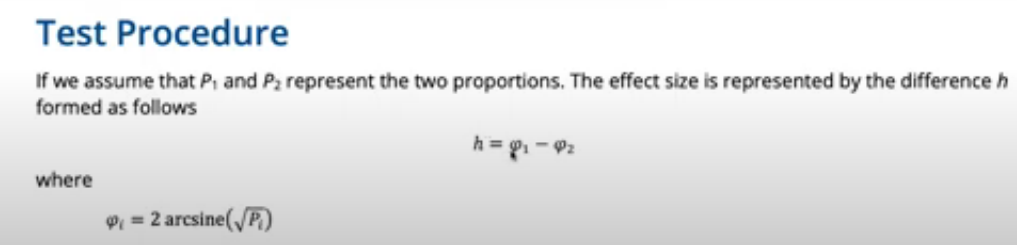

In [ ]:
# Какой будет мощность для выборки из т наблюдений, при том что величина эффекта =hc и alpha=5%
power= smp.zt_ind_solve_power(effect_size=h, nobs1=n, alpha=alpha, alternative='two-sided')
power

0.8555200838742346

In [ ]:
# Какое кол-во наблюдений необходимо для заданного эффекта при alpha = 5% и power = 80%

smp.zt_ind_solve_power(effect_size = h, alpha=alpha, power=power, alternative = 'two-sided')


449.9999999951084

In [ ]:
# Какой будет величина эффекта  при расчете теста, при укзанных alpha и power
smp.zt_ind_solve_power(nobs1 = n,  alpha = alpha, power = power)



0.20135582707747696

In [ ]:
effects = []
sample_sizes = []
for i in tqdm(range(10,10000)):
    effects.append(smp.tt_ind_solve_power(nobs1= i, alpha =alpha, power=power))
    sample_sizes.append(i)

  0%|          | 0/9990 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: divide by zero encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6832: RuntimeWarning: invalid value encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: divide by zero encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)
/usr/local/lib/python3.9/dist-packages/scipy/stats/_continuous_distns.py:6826: RuntimeWarning: invalid value encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


In [ ]:
import pandas as  pd
df = pd.DataFrame({'effects': effects,'sample_size': sample_sizes})

In [ ]:
df

,effects,sample_size
0,1.428738,10
1,1.354278,11
2,1.290467,12
3,1.234970,13
4,1.186115,14
...,...,...
9985,0.042727,9995
9986,0.042725,9996
9987,0.042723,9997
9988,0.042721,9998


In [109]:
import plotly.express as px

fig = px.line(df, x ='sample_size', y ='effects', title = 'effect vs sample size')
fig.show(renderer = "colab")

Диаграмма эффектов и количество наблюдений. чем больше эффект, тем меньше наблюдений и наоборот

In [122]:
power =[]
sample_sizes = []

for i in tqdm(range (10,10000)):
    power.append(smp.tt_ind_solve_power(nobs1=i, alpha = alpha, effect_size = 0.1 ))
    sample_sizes.append(i)



  0%|          | 0/9990 [00:00<?, ?it/s]

In [128]:
import pandas as  pd
df_2 = pd.DataFrame ({'power': power,'sample_size': sample_sizes})

In [129]:
import plotly.express as px

fig = px.line(df_2, x ='sample_size', y ='power', title = 'effect vs sample size')
fig.show(renderer = "colab")

При большем количестве наблюений фиксируем меньший эффект

**Множественная провека гипотез**


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

rvs1 = stats.norm.rvs (loc=5, scale =10, size =1000, random_state=0)

rvs2 = stats.norm.rvs (loc=6.5, scale =8, size =1000, random_state=0)

In [14]:
def t_test_function(rvs, alpha, no_test):
  counter = 0
  for i in range (no_test):
    rvs_random = stats.norm.rvs(loc=5, scale=10, size=1000, random_state=i+1)
    statistic, pvalue=stats.ttest_ind(rvs, rvs_random, equal_var=False)

    if pvalue<= alpha:
      counter =counter +1
  print (counter)

In [19]:
def bonferroni_correction_function(rvs, alpha, no_test):
    alpha_bonferroni = alpha/no_test
    counter = 0
    for i in range (no_test):
       rvs_random = stats.norm.rvs(loc=5, scale=10, size=1000, random_state=i+1)
       statistic, pvalue=stats.ttest_ind(rvs, rvs_random, equal_var=False)

       if pvalue<= alpha_bonferroni:
        counter =counter +1
    print (counter)

In [20]:
t_test_function(rvs1, alpha=0.05, no_test=100)
t_test_function(rvs2, alpha=0.05, no_test=100)

bonferroni_correction_function(rvs1, alpha=0.05, no_test=100)

bonferroni_correction_function(rvs2, alpha=0.05, no_test=100)


11
85
0
18


**Бутстрап**

In [ ]:
data = pd.read_csv('gb_sem_9_cw.csv')
pit.title('Normal Q-Q Plot')

In [ ]:
data.head(5)

,revenue,num_purchases,purchase,ab_group,av_site visit
0,0.0,0,0,A,9.040174
1,0.0,0,0,A,4.811628
2,0.0,0,0,A,7.342623
3,0.0,0,0,A,7.744581
4,0.0,0,0,A,10.511814


In [ ]:
z= data.time

AttributeError: ignored

In [ ]:
c1 = data.converted.sum()
c1

AttributeError: ignored

In [ ]:
c2 = data["converted"].value_counts()
c2

0.0    51243
1.0     7009
Name: converted, dtype: int64

In [ ]:
c3 = data["con_treat"].value_counts()
c3

treatment    29138
control      29115
Name: con_treat, dtype: int64

In [ ]:
data_control = data[data["con_treat"] == 'control']

In [ ]:
data_control.head(5)

,id,time,con_treat,page,converted
0,851104,11:48.6,control,old_page,0.0
1,804228,01:45.2,control,old_page,0.0
4,864975,52:26.2,control,old_page,1.0
5,936923,20:49.1,control,old_page,0.0
7,719014,48:29.5,control,old_page,0.0


In [ ]:
data_treatment = data[data["con_treat"] == 'treatment']
data_treatment.head(5)

,id,time,con_treat,page,converted
2,661590,55:06.2,treatment,new_page,0.0
3,853541,28:03.1,treatment,new_page,0.0
6,679687,26:46.9,treatment,new_page,1.0
8,817355,58:09.0,treatment,new_page,1.0
9,839785,11:06.6,treatment,new_page,1.0


In [ ]:
a=np.array(data.converted)
print(np.sum(a==1))


7009


In [ ]:
import math
import numpy as np